## Contexto del DataSet

El fútbol americano es un deporte complejo. Desde los 22 jugadores en el campo hasta las características específicas que van y vienen a lo largo del juego, puede ser un desafío cuantificar el valor de jugadas y acciones específicas dentro de una jugada. Fundamentalmente, el objetivo del fútbol es que la ofensiva corra (rush) o lance (pass) la pelota para ganar yardas, moviéndose hacia el lado del campo del equipo contrario para luego anotar. Y el objetivo de la defensa es evitar que el equipo ofensivo anote.

En la Liga Nacional de Fútbol (NFL), aproximadamente un tercio de las yardas ofensivas de los equipos provienen de jugadas de carrera. Generalmente, los corredores reciben la mayor cantidad de crédito por estas jugadas, pero sus compañeros de equipo (a modo de bloqueo), entrenador (jugadas), y la defensa contraria también juega un papel crítico. Las métricas tradicionales como ‘yards per carry’ o total ‘rushing yards’ pueden ser defectuosas; La NFL tiene como objetivo proporcionar un mejor contexto en lo que contribuye a una carrera exitosa.

Como un "mariscal de campo" que mira el juego, puede imaginar que puede predecir el resultado de una jugada cuando un corredor toma el pase, pero ¿qué dicen los datos? 


## Objetivo

* Realizar un análisis EDA de los datos de la NFL que nos permita tener insights de nuestros jugadores, jugadas o juegos.

In [1]:
## Importamos liberías para el procesamiento de datos - EDA
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re

sns.set_style("white", {"xtick.major.size": 1, "ytick.major.size": 5})

## 1. PROCESAMIENTO DE LOS DATOS

## 1.1 Análisis de Valores NaN/Nulos

In [2]:
## Lectura de los datos
df = pd.read_csv("train.csv")
df_cp = df.copy()
tot_rows = df_cp.GameId.count()
df_cp.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [3]:
df_cp = df.copy()
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
GameId                    682154 non-null int64
PlayId                    682154 non-null int64
Team                      682154 non-null object
X                         682154 non-null float64
Y                         682154 non-null float64
S                         682154 non-null float64
A                         682154 non-null float64
Dis                       682154 non-null float64
Orientation               682131 non-null float64
Dir                       682126 non-null float64
NflId                     682154 non-null int64
DisplayName               682154 non-null object
JerseyNumber              682154 non-null int64
Season                    682154 non-null int64
YardLine                  682154 non-null int64
Quarter                   682154 non-null int64
GameClock                 682154 non-null object
PossessionTeam            682154 non-null object
Down   

In [4]:
## Renombrar variables que usaremos

df_cp.rename(columns = {'S':'Speed'}, inplace = True)

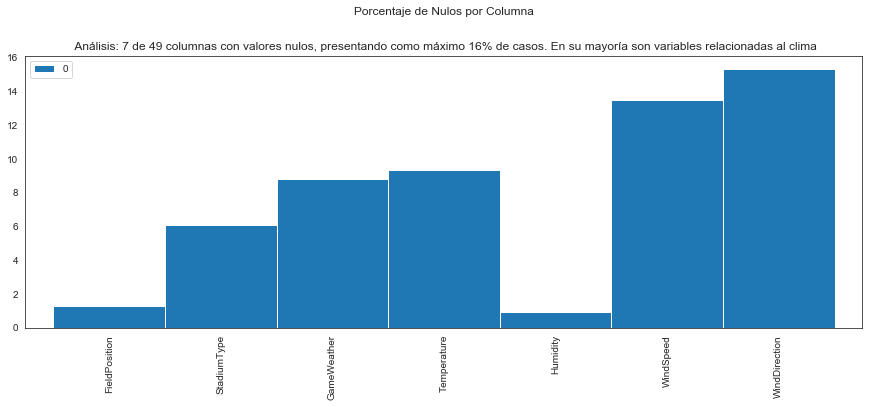

In [60]:
## Función nos da error de memoria
## HeatMap de Nulos
## sns.heatmap(df_cp.isnull())

## Analizamos el % de nulos por columna 

total_null = df_cp.isnull().sum()/df_cp.isnull().count()*100.0
total_null = total_null.to_frame()
total_null = total_null.loc[total_null.iloc[ : , 0 ] >= 0.02, :]
total_null.plot.bar(width = 1, figsize=(15,5), title="Porcentaje de Nulos por Columna\n\n\n Análisis: 7 de 49 columnas con valores nulos, presentando como máximo 16% de casos. En su mayoría son variables relacionadas al clima")

## 1.2 Limpieza de Columna con Alerta (WindSpeed)

In [6]:
## A continuación, analizo la columna 47 para entender porqué tiene tipos diferentes.
df_cp.iloc[ : , 47].describe()

count     590282
unique        69
top            5
freq       36102
Name: WindSpeed, dtype: object

In [7]:
df_cp.WindSpeed.unique()

array([8.0, 6.0, 10.0, 9.0, 11.0, nan, 7.0, 5.0, 2.0, 12.0, 1, 3, 4, 13,
       '10', '5', '6', '4', '8', '0', 'SSW', 14.0, 0.0, 15.0, 17.0, 18.0,
       16.0, '11-17', '16', '14', '13', '12', '23', '7', '9', '3', '17',
       '14-23', '1', '13 MPH', 24.0, '15', '12-22', '2', '4 MPh',
       '15 gusts up to 25', '11', '10MPH', '10mph', '22', 'E', '7 MPH',
       'Calm', '6 mph', '19', 'SE', '20', '10-20', '12mph', '6mph',
       '9mph', 'SSE', '14 Gusting to 24', '6 mph, Gusts to 10',
       '2 mph, gusts to 5', 23.0, 19, '12 mph', '9 mph, gusts to 13',
       '10 mph, gusts to 15'], dtype=object)

Nota: Esta variable tiene diversos tipos de datos:  1) datos continuas, datos expresado en rangos y variables categóricas que podrían tener algún significado.  Sospechamos que el registro de esta variable ha cambiado en el transcurso de los años ya que la información del dataset tiene datos del 2017 al 2019.

In [8]:
## Análisis de cuántos datos que no son númericos tenemos en la columna WindSpeed

df_bywindspeed = df_cp.groupby(['WindSpeed'])['GameId'].count().reset_index()
condicion = pd.Series(df_bywindspeed.WindSpeed).str.contains('.*[a-zA-Z-].*', na=False, regex=True)
print(df_bywindspeed[condicion])
garbage = df_bywindspeed[condicion]['GameId'].sum()
print('Total', garbage )
print('Respecto a:', tot_rows)
print('Equivale al: ',(garbage/tot_rows)*100.0,'%')

              WindSpeed  GameId
25  10 mph, gusts to 15    1100
26                10-20    1100
27                10MPH     902
28                10mph    1804
30                11-17     726
32               12 mph     924
33                12-22    1056
34                12mph     968
36               13 MPH    1804
38     14 Gusting to 24    1122
39                14-23     968
41    15 gusts up to 25     836
46    2 mph, gusts to 5    1122
52                4 MPh     902
55                6 mph    1034
56   6 mph, Gusts to 10    1078
57                 6mph    1804
59                7 MPH    1100
62   9 mph, gusts to 13    1122
63                 9mph     792
64                 Calm    1100
65                    E    1144
66                   SE    1122
67                  SSE     836
68                  SSW    1716
Total 28182
Respecto a: 682154
Equivale al:  4.1313251846357275 %


In [9]:
## Rescatamos/Homologamos lo que sea posible por ejemplo: 10MPH, 6mph, etc

In [10]:
df_cp.replace(to_replace ={'10MPH': 10,'10mph':10,'12 mph':12, '13 MPH':13, '4 MPh':4, '4 MPh':4, 
                           '6 mph':6, '6mph':6, '7 MPH':7, '9mph':9},inplace=True) 


In [11]:
df_bywindspeed = df_cp.groupby(['WindSpeed'])['GameId'].count().reset_index()
condicion = pd.Series(df_bywindspeed.WindSpeed).str.contains('.*[a-zA-Z-].*', na=False, regex=True)
print(df_bywindspeed[condicion])
garbage = df_bywindspeed[condicion]['GameId'].sum()
print('Total', garbage )
print('Respecto a:', tot_rows)
print('Equivale al: ',(garbage/tot_rows)*100.0,'%')


              WindSpeed  GameId
25  10 mph, gusts to 15    1100
26                10-20    1100
28                11-17     726
30                12-22    1056
31                12mph     968
34     14 Gusting to 24    1122
35                14-23     968
37    15 gusts up to 25     836
42    2 mph, gusts to 5    1122
50   6 mph, Gusts to 10    1078
54   9 mph, gusts to 13    1122
55                 Calm    1100
56                    E    1144
57                   SE    1122
58                  SSE     836
59                  SSW    1716
Total 17116
Respecto a: 682154
Equivale al:  2.509110845938014 %


### 1.3 Estandarización de la variable Altura de cada jugador

In [12]:
## Player Height
df_cp["PlayerHeight"] = df_cp["PlayerHeight"].str.replace("-",".").astype(str).astype(float)
#1 pie = 0.3048*100 metros
#1 pulgada = 0.0254*100 metros

In [63]:
df_cp.groupby(["PlayerHeight"])['GameId'].count()

PlayerHeight
5.10     32286
5.11     54009
5.60       522
5.70       945
5.80      4638
5.90     12251
6.00     67819
6.10     82336
6.20     71347
6.30    108240
6.40     90139
6.50     83706
6.60     47488
6.70     16099
6.80      7646
6.90      2683
Name: GameId, dtype: int64

In [64]:
df_cp["PlayerHeight"].describe()

count    682154.000000
mean          6.148657
std           0.445114
min           5.100000
25%           6.000000
50%           6.300000
75%           6.400000
max           6.900000
Name: PlayerHeight, dtype: float64

## 2. ANÁLISIS UNIVARIADO

### 2.1 Peso de los Jugadores de la NFL (Parte I)

Mean: 245.83468834688347
Median: 237.0
Std Dev: 46.00219916915045
Skew: 0.43318983009210127
Kurtosis: -1.042381576309144
Percentil 25: 205.0
Percentil 50: 237.0
Percentil 75: 288.0
IQR: 83.0


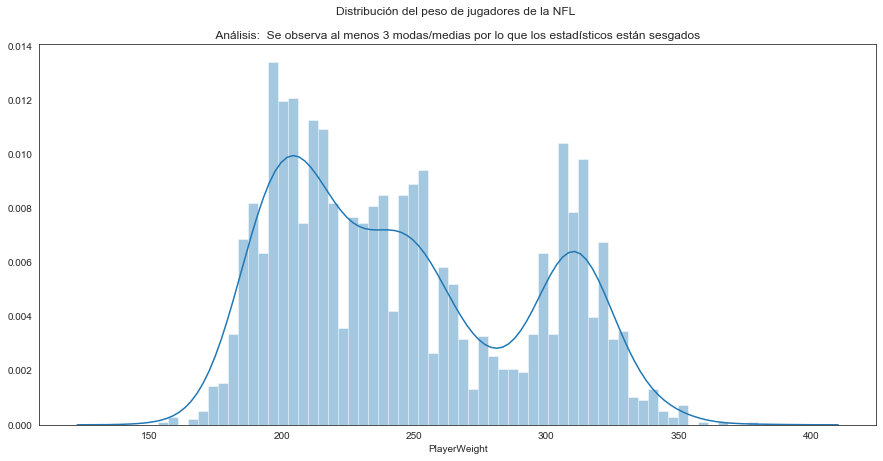

In [76]:

df_byplayw = df_cp.groupby(['PlayerWeight','DisplayName'])['GameId'].max().reset_index()

mean = df_byplayw['PlayerWeight'].mean()
median = df_byplayw['PlayerWeight'].median()
std = df_byplayw['PlayerWeight'].std()
skew = df_byplayw['PlayerWeight'].skew()
kurt = df_byplayw['PlayerWeight'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df_byplayw['PlayerWeight'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df_byplayw['PlayerWeight'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df_byplayw['PlayerWeight'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)

fig, ax = plt.subplots()
plt.title("Distribución del peso de jugadores de la NFL \n\n Análisis:  Se observa al menos 3 modas/medias por lo que los estadísticos están sesgados ")
fig.set_size_inches(15, 7)
sns.distplot(df_byplayw['PlayerWeight'], bins=60)

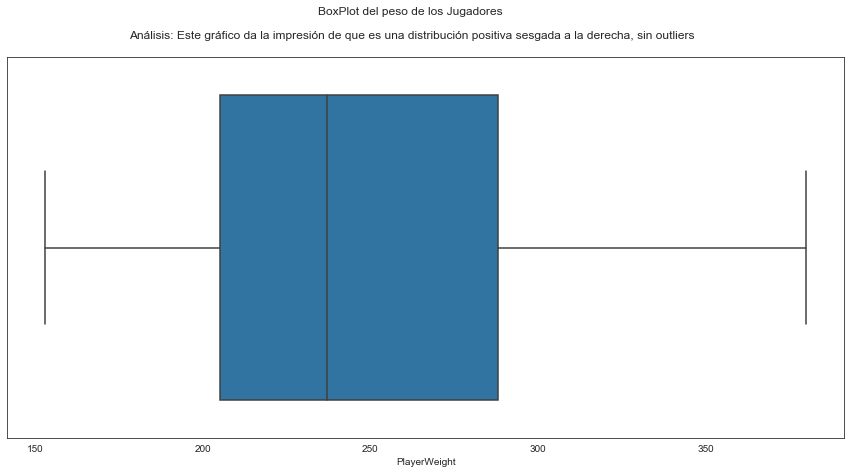

In [77]:
fig, ax = plt.subplots()
fig.suptitle('BoxPlot del peso de los Jugadores \n\nAnálisis: Este gráfico da la impresión de que es una distribución positiva sesgada a la derecha, sin outliers')
fig.set_size_inches(15, 7)
sns.boxplot(df_byplayw['PlayerWeight'])

### 2.2 Peso de los Jugadores de la NFL (Parte II) - Analisis por cada distribución

#### 2.2.1 Jugadores con menos de 225 libras

In [80]:
## División de los Jugadores en 3 segmentos:
## Segmento 1: 0 - 225 
## Segmento 2: 225 - 275
## Segmento 3: > 275

s1 = df_byplayw.loc[df_byplayw['PlayerWeight'] <=225]

mean = s1['PlayerWeight'].mean()
median = s1['PlayerWeight'].median()
std = s1['PlayerWeight'].std()
skew = s1['PlayerWeight'].skew()
kurt = s1['PlayerWeight'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(s1['PlayerWeight'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(s1['PlayerWeight'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(s1['PlayerWeight'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)


Mean: 202.63719234275297
Median: 203.0
Std Dev: 13.00707284267626
Skew: -0.28797812842428283
Kurtosis: -0.2990499255622341
Percentil 25: 194.0
Percentil 50: 203.0
Percentil 75: 213.0
IQR: 19.0


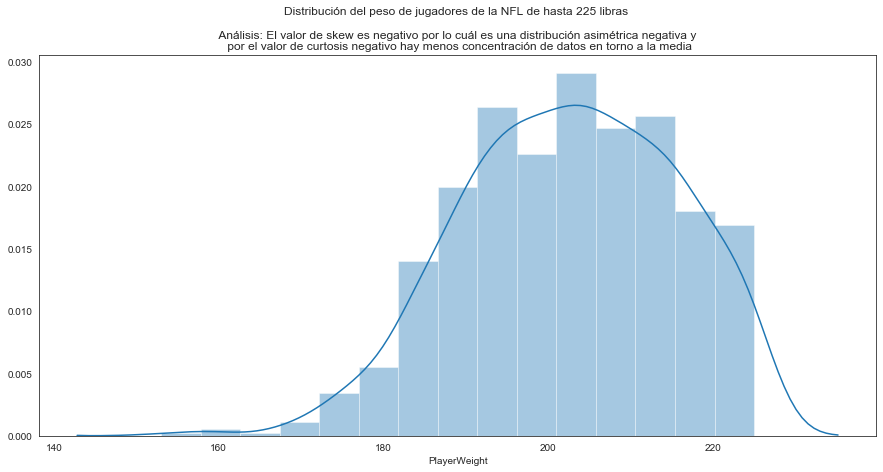

In [113]:
fig, ax = plt.subplots()
plt.title("Distribución del peso de jugadores de la NFL de hasta 225 libras \n\n Análisis: El valor de skew es negativo por lo cuál es una distribución asimétrica negativa y \n por el valor de curtosis negativo hay menos concentración de datos en torno a la media")
fig.set_size_inches(15, 7)
sns.distplot(s1['PlayerWeight'], bins=15)

#### 2.2.2 Jugadores con peso de más de 225 hasta 275 libras

In [83]:

s2 = df_byplayw.loc[(df_byplayw['PlayerWeight']>225) & (df_byplayw['PlayerWeight'] <=275) ]
mean = s2['PlayerWeight'].mean()
median = s2['PlayerWeight'].median()
std = s2['PlayerWeight'].std()
skew = s2['PlayerWeight'].skew()
kurt = s2['PlayerWeight'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(s2['PlayerWeight'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(s2['PlayerWeight'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(s2['PlayerWeight'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)

Mean: 247.9482535575679
Median: 247.0
Std Dev: 12.883491974977284
Skew: 0.2669862486171935
Kurtosis: -0.8136365463265522
Percentil 25: 237.0
Percentil 50: 247.0
Percentil 75: 257.0
IQR: 20.0


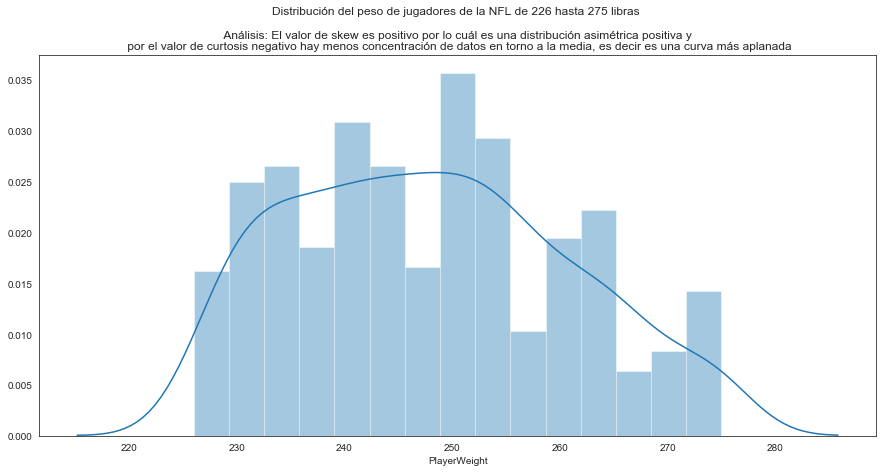

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.title("Distribución del peso de jugadores de la NFL de 226 hasta 275 libras \n\n Análisis: El valor de skew es positivo por lo cuál es una distribución asimétrica positiva y \n por el valor de curtosis negativo hay menos concentración de datos en torno a la media, es decir es una curva más aplanada")
sns.distplot(s2['PlayerWeight'], bins=15)

#### 2.2.3 Jugadores más de 275 libras

In [85]:
s3 = df_byplayw.loc[df_byplayw['PlayerWeight'] >275]

mean = s3['PlayerWeight'].mean()
median = s3['PlayerWeight'].median()
std = s3['PlayerWeight'].std()
skew = s3['PlayerWeight'].skew()
kurt = s3['PlayerWeight'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(s3['PlayerWeight'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(s3['PlayerWeight'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(s3['PlayerWeight'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)


Mean: 310.0056100981767
Median: 310.0
Std Dev: 15.173156810094552
Skew: 0.2921124009494724
Kurtosis: 0.8208996573553264
Percentil 25: 300.0
Percentil 50: 310.0
Percentil 75: 320.0
IQR: 20.0


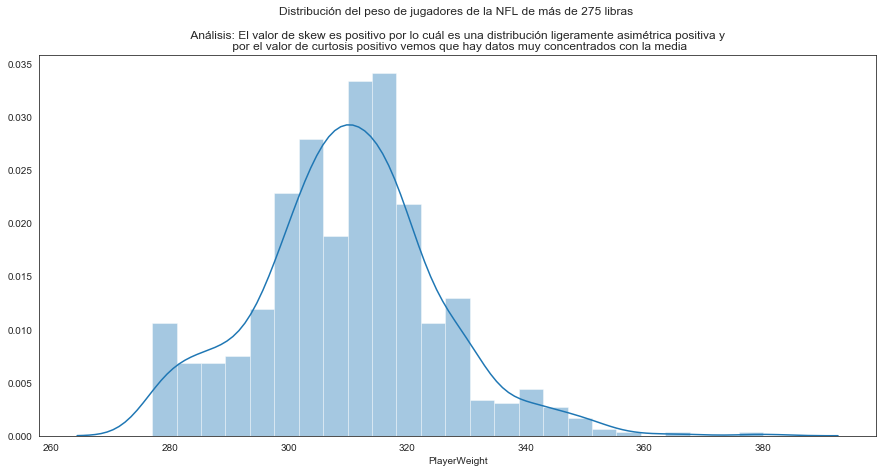

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.title("Distribución del peso de jugadores de la NFL de más de 275 libras \n\n Análisis: El valor de skew es positivo por lo cuál es una distribución ligeramente asimétrica positiva y \n por el valor de curtosis positivo vemos que hay datos muy concentrados con la media")
sns.distplot(s3['PlayerWeight'], bins=25)

### 2.3 Altura de los Jugadores de la NFL (Parte I)

In [92]:
df_byplayh = df_cp.groupby(['DisplayName'])['PlayerHeight'].max().reset_index()

mean = df_byplayh['PlayerHeight'].mean()
median = df_byplayh['PlayerHeight'].median()
std = df_byplayh['PlayerHeight'].std()
skew = df_byplayh['PlayerHeight'].skew()
kurt = df_byplayh['PlayerHeight'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df_byplayh['PlayerHeight'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df_byplayh['PlayerHeight'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df_byplayh['PlayerHeight'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)


Mean: 6.101865264797547
Median: 6.2
Std Dev: 0.46225382603196585
Skew: -1.2272154675596159
Kurtosis: 0.4955209459812959
Percentil 25: 6.0
Percentil 50: 6.2
Percentil 75: 6.4
IQR: 0.40000000000000036


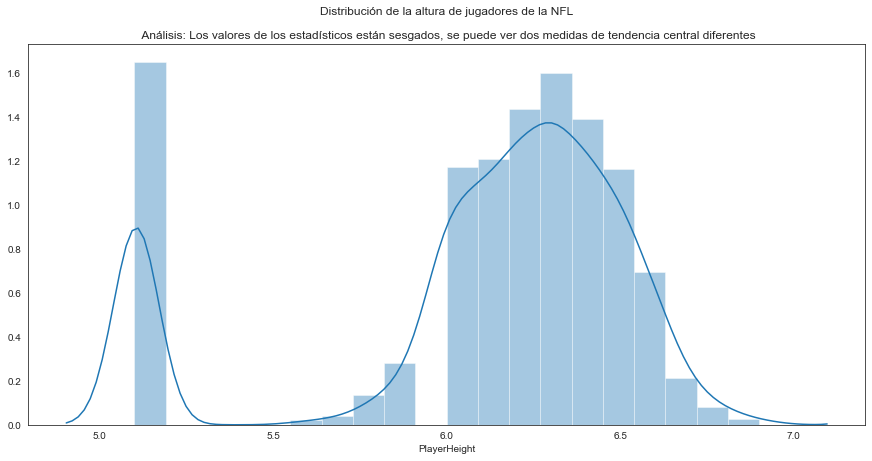

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.title("Distribución de la altura de jugadores de la NFL\n\n Análisis: Los valores de los estadísticos están sesgados, se puede ver dos medidas de tendencia central diferentes")
sns.distplot(df_byplayh['PlayerHeight'], bins=20)

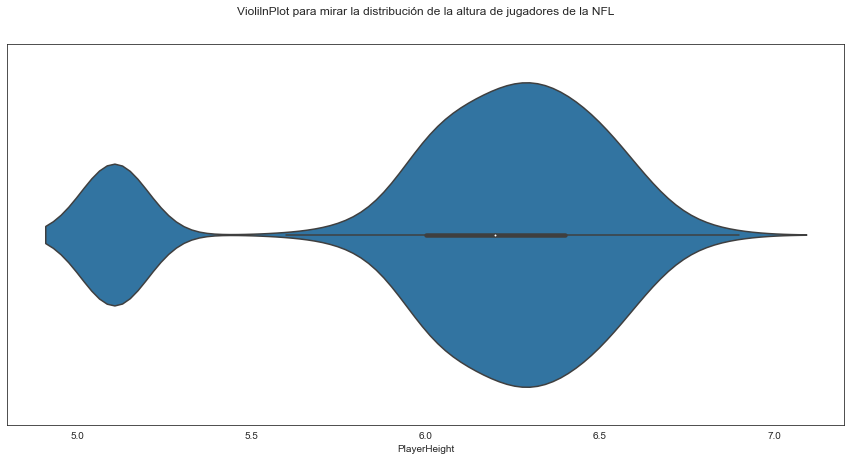

In [96]:
fig, ax = plt.subplots()
plt.title("ViolilnPlot para mirar la distribución de la altura de jugadores de la NFL\n\n")
fig.set_size_inches(15, 7)
sns.violinplot(df_byplayh['PlayerHeight'])

In [21]:
df_byplayh.groupby(['PlayerHeight'])['DisplayName'].count().reset_index()

,PlayerHeight,DisplayName
0,5.10,162
1,5.11,219
2,5.60,5
3,5.70,9
4,5.80,31
5,5.90,65
6,6.00,271
7,6.10,279
8,6.20,332
9,6.30,370


### 2.4 Altura de los Jugadores de la NFL (Parte II) - Analisis por cada distribución

#### 2.4.1 Jugadores con menos de 5.5 ft-in

In [100]:
a1 = df_byplayh.loc[df_byplayh['PlayerHeight'] <=5.5]

mean = a1['PlayerHeight'].mean()
median = a1['PlayerHeight'].median()
std = a1['PlayerHeight'].std()
skew = a1['PlayerHeight'].skew()
kurt = a1['PlayerHeight'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(a1['PlayerHeight'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(a1['PlayerHeight'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(a1['PlayerHeight'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)


Mean: 5.105748031496024
Median: 5.11
Std Dev: 0.004950228868612053
Skew: -0.30381580802848956
Kurtosis: -1.9177908660229128
Percentil 25: 5.1
Percentil 50: 5.11
Percentil 75: 5.11
IQR: 0.010000000000000675


#### 2.4.2 Jugadores con más de 5.5 ft-in

In [97]:
a2 = df_byplayh.loc[df_byplayh['PlayerHeight'] >5.5]

mean = a2['PlayerHeight'].mean()
median = a2['PlayerHeight'].median()
std = a2['PlayerHeight'].std()
skew = a2['PlayerHeight'].skew()
kurt = a2['PlayerHeight'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(a1['PlayerHeight'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(a1['PlayerHeight'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(a1['PlayerHeight'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)


Mean: 6.27540009144948
Median: 6.3
Std Dev: 0.218742690292178
Skew: -0.008585217720281242
Kurtosis: -0.35351833391968635
Percentil 25: 5.1
Percentil 50: 5.11
Percentil 75: 5.11
IQR: 0.010000000000000675


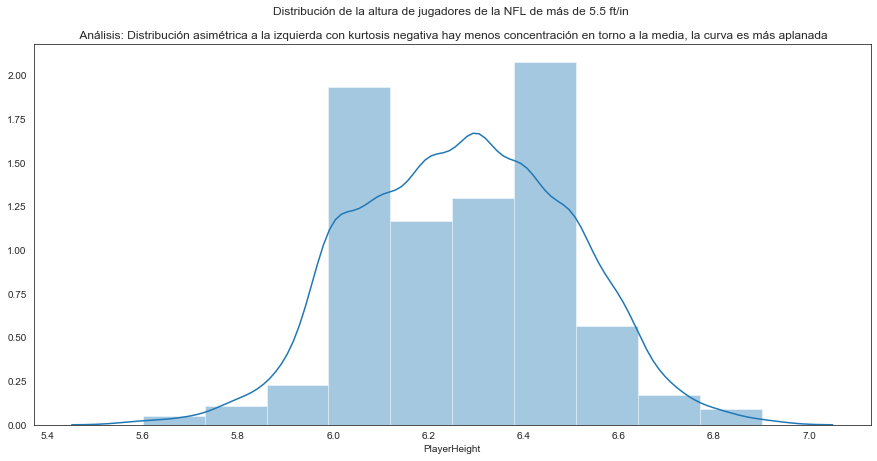

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.title("Distribución de la altura de jugadores de la NFL de más de 5.5 ft/in \n\n Análisis: Distribución asimétrica a la izquierda con kurtosis negativa hay menos concentración en torno a la media, la curva es más aplanada")
sns.distplot(a2['PlayerHeight'], bins=10)
 

## 2.3 Velocidad de los Jugadores de la NFL (yardas/seg)

Mean: 2.634597906044723
Median: 2.51
Std Dev: 1.4047728110753663
Skew: 0.4624955659394192
Kurtosis: -0.15170931021963785
Percentil 25: 1.52
Percentil 50: 2.51
Percentil 75: 3.62
IQR: 2.1


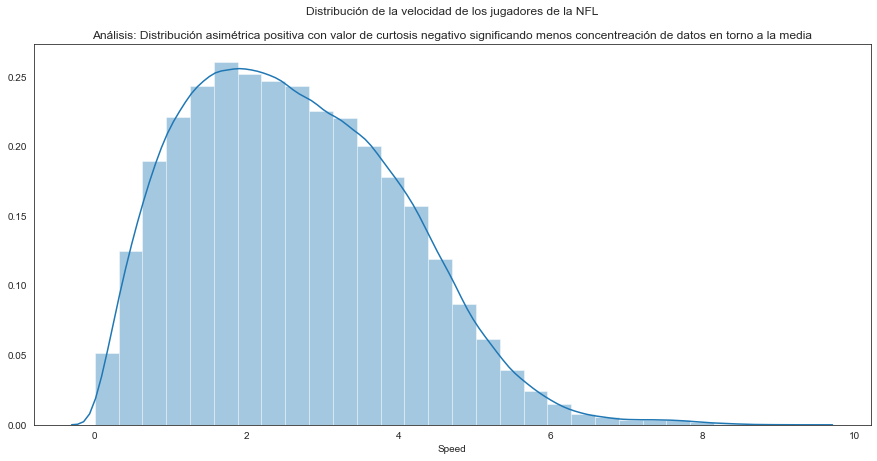

In [117]:
mean = df_cp['Speed'].mean()
median = df_cp['Speed'].median()
std = df_cp['Speed'].std()
skew = df_cp['Speed'].skew()
kurt = df_cp['Speed'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df_cp['Speed'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df_cp['Speed'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df_cp['Speed'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.title("Distribución de la velocidad de los jugadores de la NFL\n\nAnálisis: Distribución asimétrica positiva con valor de curtosis negativo significando menos concentreación de datos en torno a la media")
sns.distplot(df_cp['Speed'], bins=30)

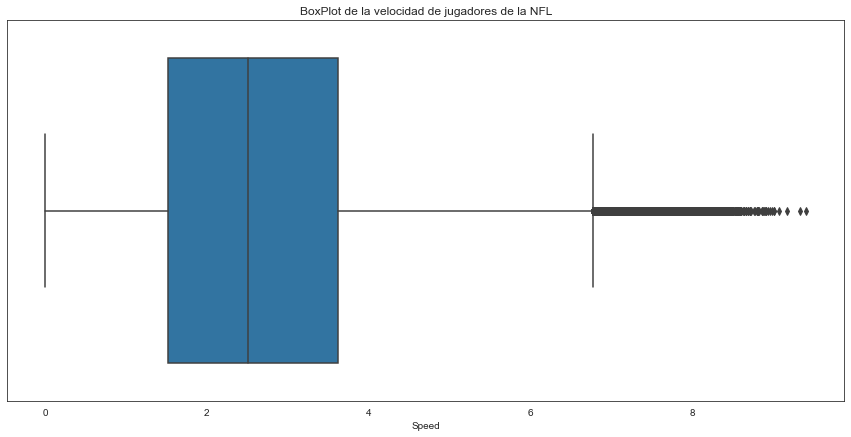

In [103]:
fig, ax = plt.subplots()
plt.title("BoxPlot de la velocidad de jugadores de la NFL")
fig.set_size_inches(15, 7)
sns.boxplot(df_cp['Speed'])

## 2.3 Conclusiones 

#### 2.3.1 Distribución de 2 o más poblaciones según su peso y altura.


* La distribución de las variables de peso y altura tienen 3 y 2 modas respectivamente.  Esto hace que los estadísticos calculados tengan sesgo y por tanto no sean representativos.  Para acotar el estudio analizaremos las distribuciones de manera independiente.

#### 2.3.2 Resultados para la Velocidad de los Jugadores de la NFL

* El valor de skew es de 0.46 que es muy cercano a cero, por lo tanto podemos decir que la velocidad en cada jugada tiene asimetría positiva es decir la "cola" de la distribución apunta hacia la derecha.
* El valor de kurtosis es negativo, lo que significa que nuestra distribución tiene colas más livianas respecto a una distribucción normal.
* A través de los gráficos histograma y boxplot confirmamos que la distribución es asimétrica positiva.

## 3. ANÁLISIS BIVARIADO

Para este análisis utilizaremos un scaterplot que nos permita visualizar la relación entre las 3 variables estudiadas anteriormente: peso, altura y velocidad

## 3.1 Peso y Velocidad

In [118]:
rho, p = st.spearmanr(df_group_s2["Speed"],df_group_s2["PlayerWeight"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor ⍴ es de: {}'.format(p))

El coeficiente de correlación de spearman es de: -0.4852532164567082
El valor ⍴ es de: 1.4244762075393094e-129


## 3.2 Peso y Altura

Aplicacamos la prueba de spearman ya que esta es una medida de la correción (asociación o independencia) entre dos variables.  En todos los casos el valor de p es muy cercano a 0 lo que indica asociación débil

In [120]:
rho, p = st.spearmanr(df_group_s2["PlayerWeight"],df_group_s2["PlayerHeight"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor ⍴ es de: {}'.format(p))

El coeficiente de correlación de spearman es de: 0.6783234650775519
El valor ⍴ es de: 8.567135564475315e-295


## 3.3 Altura y Velocidad

In [29]:
rho, p = st.spearmanr(df_group_s2["PlayerHeight"],df_group_s2["Speed"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor ⍴ es de: {}'.format(p))

El coeficiente de correlación de spearman es de: -0.32602474912355006
El valor ⍴ es de: 2.5028229627308653e-55


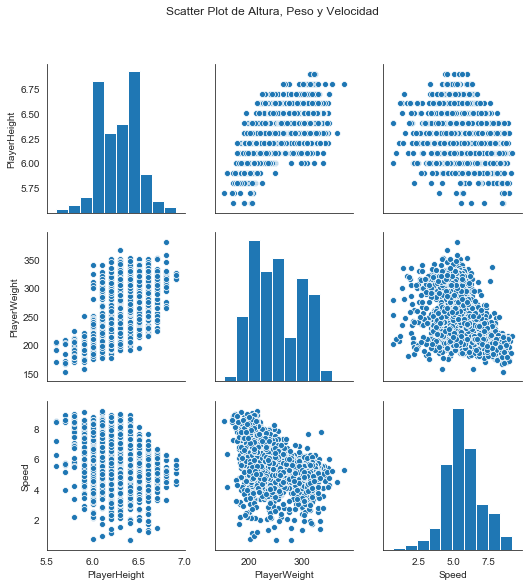

In [110]:
df_group = df_cp.groupby(['DisplayName'])['PlayerHeight', 'PlayerWeight', 'Speed'].max().reset_index()
df_group_s2=  df_group.loc[df_byplayh['PlayerHeight'] >5.5]
g = sns.pairplot(df_group_s2, kind="scatter")
g.fig.suptitle("Scatter Plot de Altura, Peso y Velocidad", y=1.08)
plt.show()


## 3.4 Conclusiones Análisis Binomial

* Dado que ⍴ en todos los casos es muy cercano a 0 significa que no hay asociación de rangos, es muy débil su correlación.


#### Nota: Interpretación Spearman 

* Un valor de +1 en ⍴ significa una perfecta asociación de rango
* Un valor 0 en ⍴ significa que no hay asociación de rangos
* Un valor de -1 en ⍴ significa una perfecta asociación negativa entre los rangos.
* Si el valor de ⍴ se acerca a 0, la asociación entre los dos rangos es más débil.

## 4. ANÁLISIS MULTIVARIADO

Analizaremos la posición Ofensa/Defensa en función de la altura, peso, y velocidad 


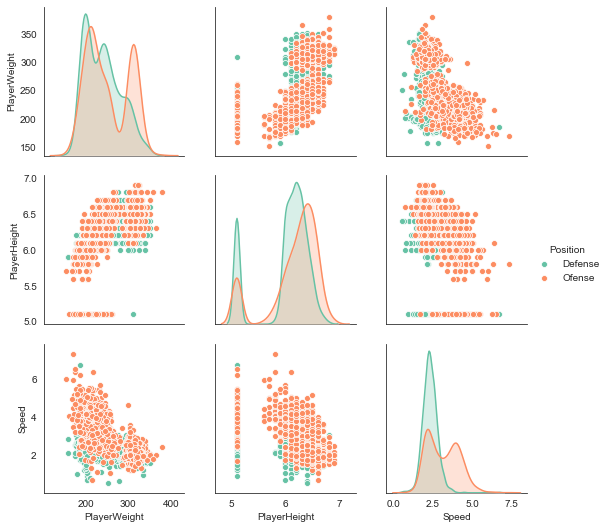

In [51]:
df_mul = df_cp.groupby(['DisplayName','Position'])['PlayerWeight','PlayerHeight','Speed'].mean().reset_index()
df_mul['Position'].unique()
        
df_mul["Position"].replace({"CB":"Defense","DT":"Defense","WR":"Ofense","G":"Ofense","TE":"Ofense","MLB":"Defense","OLB":"Defense","DB":"Defense","CB":"Defense","QB":"Ofense","RB":"Ofense","FB":"Ofense","NT":"Ofense","OT":"Ofense","DE":"Defense","FS":"Defense","SS":"Defense","LB":"Defense","ILB":"Defense","TE":"Ofense","OG":"Ofense","DL":"Defense","SS":"Defense","HB":"Ofense","SAF":"Defense","C":"Ofense","T":"Ofense","S":"Defense"}, inplace=True)

sns.pairplot(df_mul, kind="scatter", hue="Position", palette="Set2")
plt.show()

## 5. KEY INSIGHTS

## 5.1 DEL PROCESAMIENTO DE DATOS

* El dataset contiene 600K registros del año 2017 al 2019 correspondiente al rendimiento de cada jugador por juego y jugadas.
* Las variables del clima son las que presentan mayor porcentaje de valores nulos: 1) WindDirection(15.3%), WindSpeed(13.5%), GameWeather(8.8%), Temperature(9.3%), StadiumType(6.1%), FieldPosition(1.3%) y Humidity(0.9%). Para este estudio logramos rescatar la variable WindSpeed en 2% sin embargo se deberá realizar un proceso de homologación y limpieza más profundo con el fin de rellenar valores nulos y alfanuméricos/numéricos
* Usaremos las variables de Peso y Altura de los jugadores para el análisis univariado.  La variable Altura tiene un formato X-Y en donde X son total de pies y Y número de pulgadas, transformamos esta variable en continua.
* Respecto a la importancia de las columnas podemos decir que la NFL registra muchísima información de sus jugadores y serán los estadísticos los que nos pueda decir cuál de todas las variables es importante para el propósito final, sea este predecir la efectividad de una jugada o predecir el comportamiento de un jugador en el avance de yardas.

## 5.2 DEL ANÁLISIS UNIVARIADO

* Las variables de peso y altura tenían estadísticos sesgados, esto nos obliga a tener dos poblaciones o tres para ser analizadas.  Elegí segmentarlas para saber el comportamiento de cada una de ellas.

## 5.3 DEL ANÁLISIS BIVARIADO

* En el análisis bivariado pudimos comprobar que la velocidad no está regida por el peso o altura de un jugador por lo tanto hay otros factores que influyen en ella.

## 5.4 DEL ANÁLISIS MULTIVARIADO

* En el análisis multivariado dividimos en base a la ubicación de cada jugador dos grupos: el de ofensa y el defensa, en base al análisis de scatterplot podemos observar que no existe una relación directa entre su peso, altura velocidad y la ubicación en la que juega un jugador. 

